In [ ]:
'''
%load_ext pycodestyle_magic
%pycodestyle_on
'''

In [2]:
%pylab inline

import pandas as pd
from sklearn.decomposition import PCA
from scipy import stats

import gpelletier.custom.projet4.functions as gp4f
import gpelletier.stats.fonctions_univariees as gpfu
import gpelletier.stats.fonctions_bivariees as gpfb

import plotly.express as px

Populating the interactive namespace from numpy and matplotlib


In [3]:
orders = pd.read_csv(
    'archive/olist_orders_dataset.csv',
    sep=','
    )

order_reviews = pd.read_csv(
    'archive/olist_order_reviews_dataset.csv',
    sep=','
    )

order_payments = pd.read_csv(
    'archive/olist_order_payments_dataset.csv',
    sep=','
    )

order_items = pd.read_csv(
    'archive/olist_order_items_dataset.csv',
    sep=','
    )

products = pd.read_csv(
    'archive/olist_products_dataset.csv',
    sep=','
    )

category_name = pd.read_csv(
    'archive/product_category_name_translation.csv',
    sep=','
    )

customers = pd.read_csv(
    'archive/olist_customers_dataset.csv',
    sep=','
    )

sellers = pd.read_csv(
    'archive/olist_sellers_dataset.csv',
    sep=','
    )

# geolocation = pd.read_csv('archive/olist_geolocation_dataset.csv', sep=',')

In [4]:
dataset = pd.merge(
    orders,
    order_reviews,
    how='left',
    on='order_id'
    )

dataset = pd.merge(
    dataset,
    order_payments,
    how='left',
    on='order_id'
    )

dataset = pd.merge(
    dataset,
    order_items,
    how='left',
    on='order_id'
    )

dataset = pd.merge(
    dataset,
    products,
    how='left',
    on='product_id'
    )

dataset = pd.merge(
    dataset,
    category_name,
    how='left',
    on='product_category_name'
    )

dataset = pd.merge(
    dataset,
    customers,
    how='left',
    on='customer_id'
    )

dataset = pd.merge(
    dataset,
    sellers,
    how='left',
    on='seller_id'
    )

In [ ]:
'''In order to limit the RAM used, we will not use the geolocation dataset.
Further we will indicate the goal of our segmentation
and the features we need to keep or create.
But we will not need the geoocation dataset.'''

In [5]:
dataset_row_nbr = dataset.shape[0]
dataset_col_nbr = dataset.shape[1]

dataset.shape

(119151, 40)

In [6]:
dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,product_height_cm,product_width_cm,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,8.0,13.0,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,8.0,13.0,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,8.0,13.0,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4,...,13.0,19.0,perfumery,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,31570.0,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5,...,19.0,21.0,auto,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,14840.0,guariba,SP


In [ ]:
#-------------------#

In [7]:
# What kind of features are in the dataset?
dataset.dtypes.value_counts()

object     24
float64    14
int64       2
dtype: int64

In [ ]:
# There are 24 'object' features, and 16 quantitative features.

In [ ]:
#-------------------#

In [8]:
# Number of empty columns:
((dataset.isnull().sum() / len(dataset)) == 1).value_counts()

False    40
dtype: int64

In [ ]:
# There is no empty columns.

In [ ]:
#-------------------#

In [9]:
# RAM used:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119151 entries, 0 to 119150
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119151 non-null  object 
 1   customer_id                    119151 non-null  object 
 2   order_status                   119151 non-null  object 
 3   order_purchase_timestamp       119151 non-null  object 
 4   order_approved_at              118974 non-null  object 
 5   order_delivered_carrier_date   117065 non-null  object 
 6   order_delivered_customer_date  115730 non-null  object 
 7   order_estimated_delivery_date  119151 non-null  object 
 8   review_id                      119151 non-null  object 
 9   review_score                   119151 non-null  int64  
 10  review_comment_title           14189 non-null   object 
 11  review_comment_message         51250 non-null   object 
 12  review_creation_date          

In [ ]:
# Now, the dataset use 37 MB of the RAM.

In [ ]:
#-------------------#

In [ ]:
'''
For our customers segmentation, we will use 2 methods:
- a classical RFM segmentation,
- and a clustering algorithme.

For the RFM, we will need 3 features:
- the recency (to create),
- the frequency (to create),
- and the average money spend per customer (to create).

For the clustering model, we will add 2 more features
in order to include the happiness of the customers.
The 2 features we will use are :
- the delivery time (to create),
- and the review score.
'''

In [ ]:
'''
To calculate the money spend per customer,
we will need the feature 'payment_value'.

For the recency and the delivery time we will use those 2 features:
- 'order_purchase_timestamp',
- and 'order_delivered_customer_date'.
'''

In [10]:
# replace 'NaN' values
dataset = dataset.fillna(0)

# transform 'order_purchase_timestamp' -> datetime64[ns]
dataset['order_purchase_timestamp'] = pd.to_datetime(
    dataset.order_purchase_timestamp
    )

# delivery_offset
dataset['order_delivered_carrier_date'] = pd.to_datetime(
    dataset.order_delivered_carrier_date
    )

dataset['order_delivered_customer_date'] = pd.to_datetime(
    dataset.order_delivered_customer_date
    )

# number of days to be delivered
dataset['delivery_time'] = (
    dataset['order_delivered_customer_date'] -
    dataset['order_delivered_carrier_date']
    ).apply(lambda x: x.days)

# sort the data by order_purchase_timestamp
dataset = dataset.sort_values(by='order_purchase_timestamp', ascending=False)
dataset = dataset.reset_index()
dataset = dataset.drop_duplicates()

In [11]:
# Focus only on the delivered orders
data_to_use = dataset[dataset['order_status'] == 'delivered']

# We can now select only the features we will need:
data_to_use = data_to_use[
    [
        'customer_unique_id', 'customer_id',
        'order_id', 'payment_value',
        'order_purchase_timestamp',
        'delivery_time', 'review_score'
        ]
    ]

In [ ]:
'''NB: because of the RFM and the clustering model (Kmeans),
we will not use 'object' features (Kmeans can only use numbers)'''

In [ ]:
#-------------------#
#-------------------#

In [ ]:
'''For the segmentation , we will use the data trimester by trismester.
For the analysis, we can focus only on the first trimester of 2017 (2016 doesn't contain a lot of months in the dataset)'''

In [12]:
date_start = pd.Timestamp('2017-01-01')

# Trimester:
relativedelta_months = 3

df_tmp = data_to_use.copy()

df_tmp.loc[
    (df_tmp['order_purchase_timestamp'] >= date_start)
    & (df_tmp['order_purchase_timestamp'] < date_start +
        relativedelta(months=+ relativedelta_months)),
    'date_ok'] = 'True'

df_subset = df_tmp[df_tmp['date_ok'] == 'True'].drop(
    columns=['date_ok']
    ).reset_index(drop=True)

# Update the recency thanks to the most recent date
df_subset['recency'] = max(
    df_subset['order_purchase_timestamp']
    ) - df_subset['order_purchase_timestamp']

In [13]:
df_subset

,customer_unique_id,customer_id,order_id,payment_value,order_purchase_timestamp,delivery_time,review_score,recency
0,41f40395978d5bd6b6ab63c77ccfc03a,5a65eb00a924ba21a2a323650fe0a070,0e66c646ef5d6364215ef15b3826c4c7,410.56,2017-03-31 23:54:45,2,5,0 days 00:00:00
1,88096271a97e2192b1dbd67c4b06d394,d5860794e75af105e5a325b4502e00b9,7a47100118f6775bec039a3b87ddedf5,99.32,2017-03-31 23:32:18,12,4,0 days 00:22:27
2,f389ca60b51c77eba0045a6789014b42,3d276542cf8bf4318da2597f419334a2,149e467b7d8c16156fa0810e8b4e1e8a,127.42,2017-03-31 23:23:43,13,4,0 days 00:31:02
3,fc1c186e0436f5b790ab26eea95aafff,581588a30afa8dd7bf1179f15ef2e94e,8f3c9dee0b510175b90cce425174b78e,68.80,2017-03-31 23:02:01,36,1,0 days 00:52:44
4,589ee29a3decf9bd5cd8492da02efb2e,5d8f7d35350a0802b7e4bea9671b132a,a082f140d70dd20b4e2d7538557b5946,127.90,2017-03-31 22:28:39,12,4,0 days 01:26:06
...,...,...,...,...,...,...,...,...
6047,728e4a7d0db4845270091ded0923c71f,42d857e22f61f10476f0cda1aacc018a,6acecf438369055d9243e121045cca74,18.62,2017-01-05 12:11:23,5,5,85 days 11:43:22
6048,728e4a7d0db4845270091ded0923c71f,e6bee29442c761ff0dfb9a4414922a5c,7a18a504c1a4b32d883e68de2e1a7db0,16.62,2017-01-05 12:09:08,5,5,85 days 11:45:37
6049,728e4a7d0db4845270091ded0923c71f,d2c63ad286e3ca9dd69218008d61ff81,38bcb524e1c38c2c1b60600a80fc8999,11.62,2017-01-05 12:06:36,5,5,85 days 11:48:09
6050,83e7958a94bd7f74a9414d8782f87628,ff3c6d35b4927c9b965aa6a68dcf56e4,b95a0a8bd30aece4e94e81f0591249d8,19.62,2017-01-05 12:01:20,5,5,85 days 11:53:25


In [14]:
# RFM - Delivery - Review subset
id_key = 'customer_unique_id'

# Filter the orders
df_subset = df_subset[dataset.duplicated(subset=[
    'order_purchase_timestamp',
    'order_id'
    ]) == False]

# Monetary Function
# Finding total amount spent per customer
monetary = df_subset[[id_key, 'payment_value']].groupby(
    id_key,
    as_index=False
    ).median()

# Frequency function
frequency = pd.DataFrame({
    id_key: df_subset[id_key].value_counts().index,
    'frequency': df_subset[id_key].value_counts()
    }).reset_index(drop=True)

# merging these datasets
RM = monetary.merge(frequency, on=id_key, how='left')

# Recency Value
tmp = df_subset[[id_key, 'recency']].groupby(
    id_key,
    as_index=False
    ).min()

# delivered timelaps
d_time = df_subset[[id_key, 'delivery_time']]
d_time = d_time.groupby(id_key, as_index=False).median()
tmp = pd.merge(tmp, d_time, how='left', on=id_key)

# RFM combined DataFrame
# Combining all recency, frequency and monetary parameters
RFM = pd.merge(RM, tmp, how='left', on=id_key)
RFM['recency'] = RFM['recency'].apply(lambda x: x.days)

# review score
review_score = df_subset[[id_key, 'review_score']].groupby(
    id_key,
    as_index=False
    ).median()
RFM = pd.merge(RFM, review_score, how='left', on=id_key)

# Delete outliers for the payment_value
RFM = gpfu.zscore_filter(RFM, 'payment_value', zscore_seuil=3)

RFM = RFM.drop(["customer_unique_id"], axis=1)
RFM = RFM.dropna()

In [15]:
RFM.head()

,payment_value,frequency,recency,delivery_time,review_score
0,86.22,1,21,23.0,3.0
1,150.12,1,27,3.0,4.0
2,76.11,1,69,9.0,4.0
3,35.84,1,12,8.0,3.0
4,237.81,1,5,13.0,4.0


In [ ]:
#-------------------#
#-------------------#

In [16]:
# Define the data for the analysis
# The functions are definied in the custom library 'functions.py'

data = gp4f.data_no_quali_features('customer_unique_id')

# Generate RFM + delivery and review score for a dataset filtered by date
data_subset_RFM = gp4f.rfm_review_data(
    data, 'customer_unique_id', 'customer_id',
    'order_id', 'product_id', 'payment_value',
    'review_score', 'order_purchase_timestamp', '2017-01-01', 3)

# Transform the data thanks to a scaler (QuantileTransfomer)
x_scaled = gp4f.RFM_review_to_x_scaled(data_subset_RFM)

In [ ]:
#-------------------#
#-------------------#

In [17]:
data_subset_RFM.columns

Index(['payment_value', 'frequency', 'recency', 'delivery_time',
       'review_score'],
      dtype='object')

In [ ]:
# Distribution of the features

mean:    141.024
median:  100.000
var:     18465.645
ect:     135.888

Skewness de la colonne [payment_value]:
La distribution est etalee a droite.
skewness: 2.530

Kurtosis de la colonne [payment_value]:
Les observations sont plus concentrées : la distribution est moins aplatie.
kurtosis: 7.890



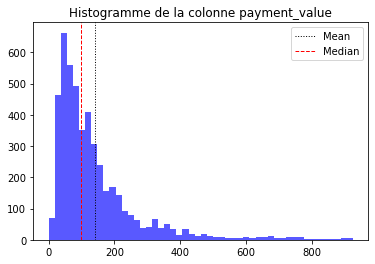

In [18]:
gpfu.show_hist_colonne(data_subset_RFM, 'payment_value')

mean:    4.613
median:  4.615
var:     0.695
ect:     0.834

Skewness de la colonne [payment_value]:
La distribution est etalee a gauche.
skewness: -0.150

Kurtosis de la colonne [payment_value]:
Les observations sont plus concentrées : la distribution est moins aplatie.
kurtosis: 1.040



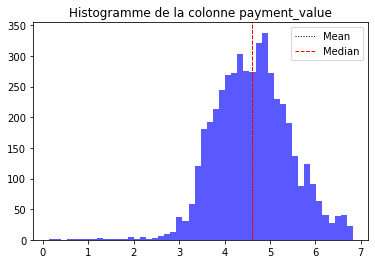

In [19]:
tmp = data_subset_RFM.copy()
tmp['payment_value'] = np.log(tmp['payment_value'] + 1)
gpfu.show_hist_colonne(tmp, 'payment_value')

mean:    1.021
median:  1.000
var:     0.030
ect:     0.172

Skewness de la colonne [frequency]:
La distribution est etalee a droite.
skewness: 12.080

Kurtosis de la colonne [frequency]:
Les observations sont plus concentrées : la distribution est moins aplatie.
kurtosis: 219.520



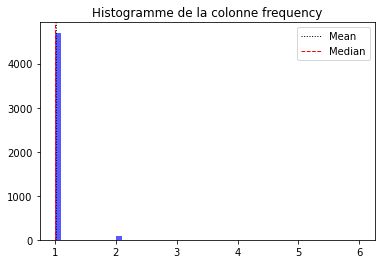

In [20]:
gpfu.show_hist_colonne(data_subset_RFM, 'frequency')

mean:    32.894
median:  30.000
var:     467.605
ect:     21.624

Skewness de la colonne [recency]:
La distribution est etalee a droite.
skewness: 0.290

Kurtosis de la colonne [recency]:
Les observations sont moins concentrées : la distribution est plus aplatie.
kurtosis: -1.050



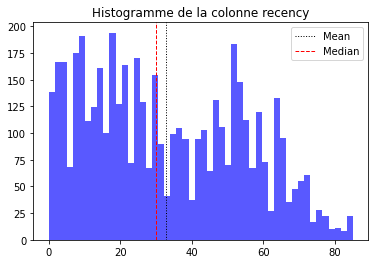

In [21]:
gpfu.show_hist_colonne(data_subset_RFM, 'recency')

mean:    9.200
median:  7.000
var:     146.611
ect:     12.108

Skewness de la colonne [delivery_time]:
La distribution est etalee a droite.
skewness: 9.390

Kurtosis de la colonne [delivery_time]:
Les observations sont plus concentrées : la distribution est moins aplatie.
kurtosis: 122.290



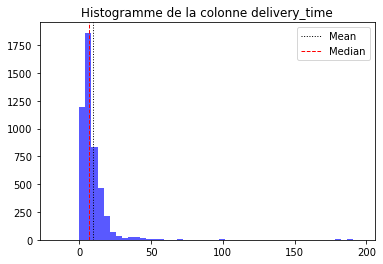

In [22]:
gpfu.show_hist_colonne(data_subset_RFM, 'delivery_time')

mean:    4.178
median:  5.000
var:     1.549
ect:     1.244

Skewness de la colonne [review_score]:
La distribution est etalee a gauche.
skewness: -1.510

Kurtosis de la colonne [review_score]:
Les observations sont plus concentrées : la distribution est moins aplatie.
kurtosis: 1.140



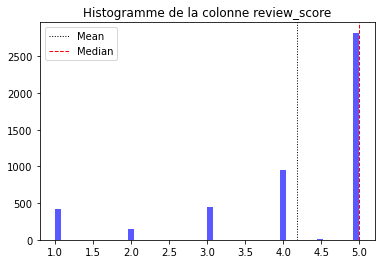

In [23]:
gpfu.show_hist_colonne(data_subset_RFM, 'review_score')

In [ ]:
'''
For the RFM segmentation, we will use normal distributions.
So, the feature 'payment_value' will be transformed
thanks to a logarithmic function.

For the clustering model, we will only use a scaler (QuantileTransformer).
'''

In [ ]:
#-------------------#
#-------------------#

In [ ]:
# Correlation between the features

In [24]:
gpfb.corr_tab_quanti_quanti(data_subset_RFM, 'payment_value', 0, 1)

corr (abs) >=  0
pourcentage valeurs manquantes par colonne <  100 %



,payment_value corr with:,corr,p-value
3,delivery_time,0.043166,0.002813
4,review_score,-0.029205,0.043303
1,frequency,-0.028028,0.052466
2,recency,0.013633,0.345599


In [25]:
gpfb.corr_tab_quanti_quanti(data_subset_RFM, 'delivery_time', 0, 1)

corr (abs) >=  0
pourcentage valeurs manquantes par colonne <  100 %



,delivery_time corr with:,corr,p-value
4,review_score,-0.192996,2.111405e-41
0,payment_value,0.043166,2.812985e-03
2,recency,-0.028765,4.655999e-02
1,frequency,-0.020084,1.646817e-01


In [26]:
gpfb.corr_tab_quanti_quanti(data_subset_RFM, 'review_score', 0, 1)

corr (abs) >=  0
pourcentage valeurs manquantes par colonne <  100 %



,review_score corr with:,corr,p-value
3,delivery_time,-0.192996,2.111405e-41
0,payment_value,-0.029205,4.330305e-02
2,recency,0.014284,3.230701e-01
1,frequency,-0.010005,4.888426e-01


In [27]:
gpfb.corr_tab_quanti_quanti(data_subset_RFM, 'frequency', 0, 1)

corr (abs) >=  0
pourcentage valeurs manquantes par colonne <  100 %



,frequency corr with:,corr,p-value
2,recency,0.050972,0.000418
0,payment_value,-0.028028,0.052466
3,delivery_time,-0.020084,0.164682
4,review_score,-0.010005,0.488843


In [28]:
gpfb.corr_tab_quanti_quanti(data_subset_RFM, 'recency', 0, 1)

corr (abs) >=  0
pourcentage valeurs manquantes par colonne <  100 %



,recency corr with:,corr,p-value
1,frequency,0.050972,0.000418
3,delivery_time,-0.028765,0.046560
4,review_score,0.014284,0.323070
0,payment_value,0.013633,0.345599


In [ ]:
'''These features are independent (one in relation to the other)'''

In [ ]:
#-------------------#
#-------------------#

In [ ]:
# How the scaler QuantileTransformer can change the data?

In [29]:
tmp = pd.DataFrame({
    'Value': data_subset_RFM['payment_value'],
    'Features before QuantileTransformer':
        ['payment_value'] * len(data_subset_RFM)
})

for i in range(1, len(data_subset_RFM.columns)):
    tmp = pd.concat([
        tmp, pd.DataFrame({
            'Value': data_subset_RFM[data_subset_RFM.columns[i]],
            'Features before QuantileTransformer':
                [data_subset_RFM.columns[i]] * len(data_subset_RFM)
        })
    ])

fig = px.box(tmp, x="Features before QuantileTransformer", y="Value")
fig.show()

In [30]:
tmp_scaled = pd.DataFrame({
    'Value': x_scaled['Monetary_Value'],
    'Features after QuantileTransformer': ['Monetary_Value'] * len(x_scaled)
})

for i in range(1, len(x_scaled.columns)):
    tmp_scaled = pd.concat([
        tmp_scaled, pd.DataFrame({
            'Value': x_scaled[x_scaled.columns[i]],
            'Features after QuantileTransformer':
                [x_scaled.columns[i]] * len(x_scaled)
        })
    ])

fig = px.box(tmp_scaled, x="Features after QuantileTransformer", y="Value")
fig.show()

In [ ]:
'''
Thanks to this scaler, the range of the different features is the same.
All the features will have the same weight in the clustering model.
'''

In [ ]:
#-------------------#
#-------------------#

In [ ]:
# Customer behaviors

In [31]:
pca = PCA(n_components=1)
x_tranformed = pca.fit_transform(x_scaled)

print('Explained variance: {:.1f} %'.format(
    pca.explained_variance_ratio_[0] * 100
    ))

Explained variance: 74.6 %


In [32]:
stats.describe(x_tranformed)

DescribeResult(nobs=4788, minmax=(array([-2.95630334]), array([7.82034758])), mean=array([4.5410626e-16]), variance=array([12.79057222]), skewness=array([0.75572133]), kurtosis=array([-0.82238316]))

In [33]:
stats.bayes_mvs(x_tranformed, 0.9)

(Mean(statistic=4.541062596963046e-16, minmax=(-0.08500604604740082, 0.0850060460474017)),
 Variance(statistic=12.787900842396317, minmax=(12.358003813290363, 13.21779787150227)),
 Std_dev(statistic=3.576017455549723, minmax=(3.5159091039477497, 3.6361258071516964)))

In [ ]:
'''
In order to analyse the dataset, we used a PCA with 1 component.
This PCA explained ~75% of the variance of the dataset.

In compare to the mean magnitude,
the standard deviation and the variance are very low.

We can deduce the following fact:
All customer behaviours are very similar.
In other words,
all customers has the same behavior in compare to the average customer.

That is an important fact.
It will badly influence our segmentation algorithm,
because of the similiraty in our dataset.
We have to be prepared to obtain not so good clusters
(i.e. low silhouette score, for example).
'''